<a href="https://colab.research.google.com/github/cristiangodoyangel/Modelo-de-Prediccion-Suscripcion-Productos-Bancarios/blob/main/Modelo_de_Predicci%C3%B3n_Elecci%C3%B3n_Productos_Bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación con el Bank Marketing Dataset

## Descripción del Dataset

El dataset **Bank Marketing Dataset**, contiene información sobre campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.

El objetivo es predecir si un cliente suscribirá un depósito a plazo fijo (variable objetivo `y`), a partir de datos personales y del historial de contacto previo.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# se carga dataset de vinos blancos
path = "/content/drive/MyDrive/0002 Python - Data Science/Datasets/Examen/02/bank-full.csv"
df = pd.read_csv(path, sep=";")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Entendiendo el Dataset

Antes de cualquier avance, es importante conocer  el dataset. así entiendo lo difícil del problema, entendiendo el target (lo que buscamos) sabré si debo escalar o codificar.
 Resivo el tipo de columnas.


In [ ]:
# Se revisa el df para entenderlo
print("\n")
print("========================================================================================================================================")
print("Dimensiones del dataset:", df.shape)
print("========================================================================================================================================")
print("\n")
df.head()



Dimensiones del dataset: (45211, 17)




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# se revisan los tipos de columnas
print("\n")
print("========================================================================================================================================")
print("Dimensiones del dataset:", df.shape)
print("========================================================================================================================================")
print("\n")
df.info()



Dimensiones del dataset: (45211, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Columnas Correctamente tipadas


Todas corectamente tipadas, solo default, housing, loan serán transdormadas con ColumnTransformer para binaria

===============================================================================================

In [ ]:
# Estadísticas descriptivas generales
print("\n")
print("========================================================================================================================================")
print("Estadísticas Descriptivas")
print("========================================================================================================================================")
print("\n")
df.describe()




Estadísticas Descriptivas




,age,balance,day,duration,campaign,pdays,previous
count,40856.000000,40856.000000,40856.000000,40856.000000,40856.000000,40856.000000,40856.000000
mean,40.897763,1368.953177,15.448698,264.857989,2.007661,42.405693,0.593646
std,10.709648,3053.425065,8.244538,257.916807,1.139264,102.299105,2.306062
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,76.000000,8.000000,109.000000,1.000000,-1.000000,0.000000
50%,39.000000,455.000000,15.000000,187.000000,2.000000,-1.000000,0.000000
75%,48.000000,1440.000000,21.000000,326.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,5.000000,871.000000,275.000000


Estadísticas descriptivas básicas como media, mediana y desviación estándar.  

Variables como `duration` y `pdays` muestran alta asimetría, se confirmaría en gráfiocos.


## Manejo de nulos o inválidos

Al parecer no hay información vacía, lo vemos en 45211 non-null, pero al revisar con .head() vimos que hay "unknow" en las columnas postcome y contact, revisaré si son necesarias para el target, si no es así se eliminarán.

In [ ]:
# consulté a chatGPT la forma de saber y entender si una columna afecta o no a un target, me dió el siguiente código


# Relación entre 'contact' y la variable objetivo
print("========================================================================================================================================")
print(df['contact'].value_counts())
print("========================================================================================================================================")
print("\n")
print(pd.crosstab(df['contact'], df['y'], normalize='index'))

# Relación entre 'poutcome' y la variable objetivo
print("========================================================================================================================================")
print(df['poutcome'].value_counts())
print("========================================================================================================================================")
print("\n")

print(pd.crosstab(df['poutcome'], df['y'], normalize='index'))

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


y                no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
unknown    0.959293  0.040707
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
unknown   0.908385  0.091615


In [ ]:
# se aplica codigo, por buena práctica
print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Conteo de valores "unknown" por columna

# Creamos un filtro para identificar "unknown" en cada columna tipo object (categórica)
unknown_counts = df.select_dtypes(include='object').apply(lambda col: (col == 'unknown').sum())

# Mostramos solo las columnas que contienen al menos un "unknown"
unknown_counts = unknown_counts[unknown_counts > 0]

# se muestra el resultado
print("========================================================================================================================================")
print("Conteo de valores 'unknown' por columna:")
print("========================================================================================================================================")
print("\n")

print(unknown_counts)


Conteo de valores 'unknown' por columna:


job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


# Revisión de datos "unknown"

Se analizó la relación entre las variables `contact` y `poutcome` que son las que contienen "unknown" para determinar si es conveniente eliminarlas o conservarlas.

### `contact`:
- Los clientes contactados por celular  o teléfono  tienen tasas de aceptación mayores al 13%.
- En cambio, los que tienen tipo `unknown` apenas superan el 4%.

Cómo se contacta al lciente SI influye en su suscripción, por lo tanto las dejaré.

### `poutcome`:
- Los clientes cuyo resultado de una campaña anterior fue `success` tienen una tasa de conversión del **64.7%**, muy por encima de otras categorías.
- Este historial es claramente un predictor fuerte para la decisión actual.

Mismo caso que con la columna `contact`, las dejaré. ambas columnas aportan valor a la predicción.

# Manejo de duplicados ###

Revisamos si existen valores duplicados, si existen se analizarán y se determinará usarlos o no.

In [ ]:
# Verificación y eliminación de filas duplicadas

# Se calcula cuántas filas están completamente duplicadas (todas las columnas iguales)
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicados}")

# Si hay duplicados, se eliminan
if duplicados > 0:
    df = df.drop_duplicates()
    print("========================================================================================================================================")
    print("Duplicados eliminados. Nuevas dimensiones del dataset:", df.shape)
    print("========================================================================================================================================")
    print("\n")

else:
    print("========================================================================================================================================")
    print("No se encontraron filas duplicadas. No fue necesario eliminar ninguna.")
    print("========================================================================================================================================")
    print("\n")



Número de filas duplicadas encontradas: 0
No se encontraron filas duplicadas. No fue necesario eliminar ninguna.




## Sin registros duplicados
```



# Revisión de Inconsistencias

In [ ]:
# Se revisan  inconsistencias en variables categóricas
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())



Valores únicos en 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Valores únicos en 'marital':
['married' 'single' 'divorced']

Valores únicos en 'education':
['tertiary' 'secondary' 'unknown' 'primary']

Valores únicos en 'default':
['no' 'yes']

Valores únicos en 'housing':
['yes' 'no']

Valores únicos en 'loan':
['no' 'yes']

Valores únicos en 'contact':
['unknown' 'cellular' 'telephone']

Valores únicos en 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Valores únicos en 'poutcome':
['unknown' 'failure' 'other' 'success']

Valores únicos en 'y':
['no' 'yes']


## Revisión de inconsistencias en valores categóricos

Se revisaron todas las columnas categóricas del dataset (`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `y`) para detectar posibles inconsistencias.

No se encontraron valores  inconsistentes.

===============================================================================================

## Exploración de Datos:

# Distribución de edad

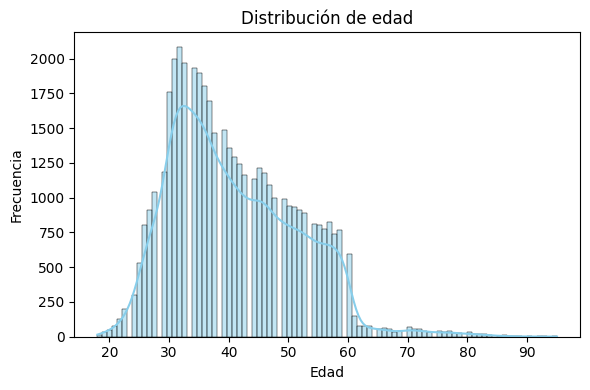

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True, color='skyblue')
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



# Edad de Clientes
los clientes están mas entre 30 y 40 años. solo algunos clientes mayores de 60 años. No hay valores outliers en edades.


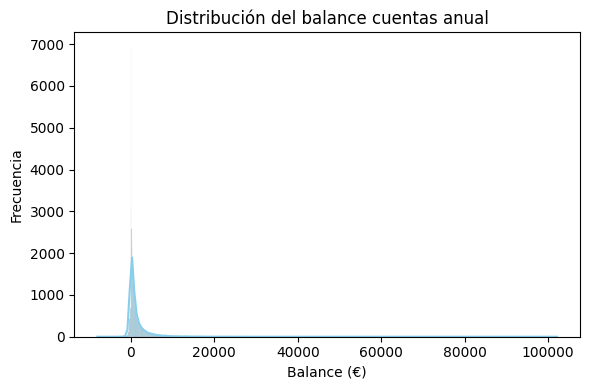

In [ ]:
#Balance en las cuentas de clientes

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='balance', kde=True, color='skyblue')
plt.title('Distribución del balance cuentas anual')
plt.xlabel('Balance (€)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


En  `balance` vemos que la mayoria de los  clientes tiene un balance cercano a 0, y también hay pocos  valores extremos que superan los 10.000 €, claramente outliers. También hay sldos en negativo, NO los eliminaré, no son outliers ni errores, son deudas o sobregiro.


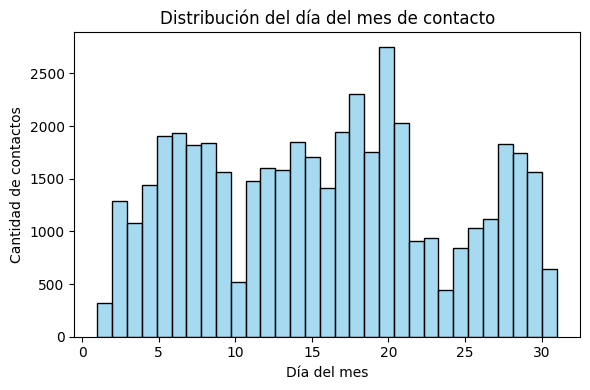

In [ ]:
# Dias de contactos a clientes
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='day', kde=False, bins=31, color='skyblue')
plt.title('Distribución del día del mes de contacto')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de contactos')
plt.tight_layout()
plt.show()


Día del mes en que se realizó el contacto. Se observa que hay ciertos días con muchos más contactos, como el día 5 y 20, lo que sugiere que las campañas de marketing se concentraron en fechas específicas. puede ser por fechas de pagos, yo trabaé en IBM hace un tiempo y nos pagaban los 20 de cada mes.


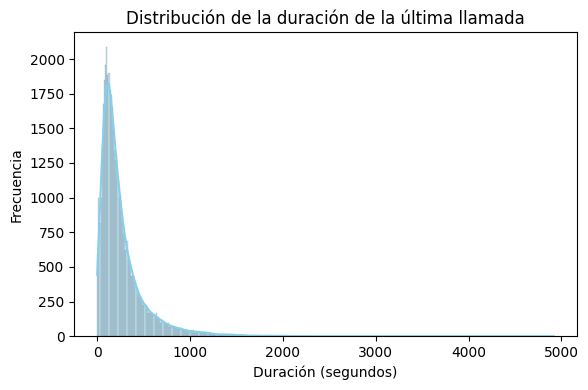

In [ ]:
# Duración de llamadas
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='duration', kde=True, color='skyblue')
plt.title('Distribución de la duración de la última llamada')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


La mayoría de las llamadas duran menos de 3 minutos, pero hay llamdas que llegan a 50 minutos, revisaré la relación de llamadas con las suscripciones.


/tmp/ipython-input-44-4163766941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='pastel')


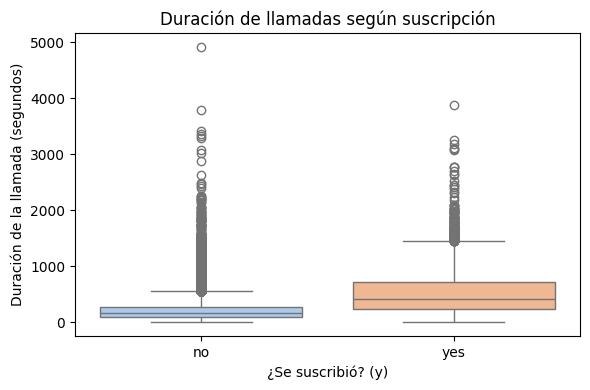

In [ ]:
# duración llamas vs suscripciones

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='y', y='duration', palette='pastel')
plt.title('Duración de llamadas según suscripción')
plt.xlabel('¿Se suscribió? (y)')
plt.ylabel('Duración de la llamada (segundos)')
plt.tight_layout()
plt.show()


Mientras msa dure la llamada, es porque el cliente está interesado y quiere mas información, por lo que lleva a mas suscripciones,

No eliminaré los uotliers.


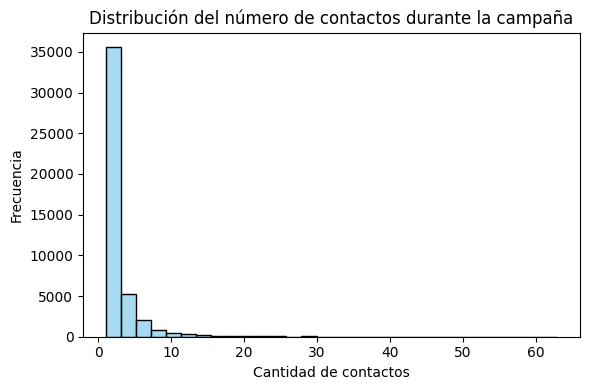

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='campaign', kde=False, bins=30, color='skyblue')
plt.title('Distribución del número de contactos durante la campaña')
plt.xlabel('Cantidad de contactos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


La mayoría de los clientes fueron contactados entre 1 y 3 veces durante la campaña. y hay hasta 30 contactos hacia el mismo cliente, esto si lo tomaré como outliers y elminaré


In [ ]:
# Eliminar registros con más de 5 contactos durante la campaña
df = df[df['campaign'] <= 5]
print("Nuevo tamaño del dataset después de eliminar outliers en 'campaign':", df.shape)


Nuevo tamaño del dataset después de eliminar outliers en 'campaign': (40856, 17)


Si el cliente al 5to llamado ya no contrató, llamarlo mas  veces no tendrá su conversión a suscripción, mantener los valores de mas de 5 llamadas genera ruido para el modelo.

Esta limpieza busca mejorar la calidad predictiva y evitar sesgos por insistencia extrema.


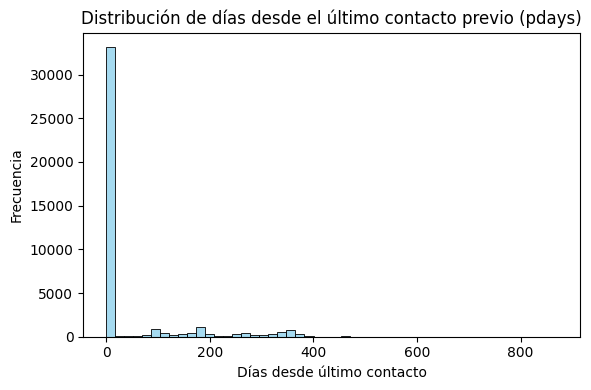

In [ ]:
# último contacto con cliente
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='pdays', bins=50, color='skyblue')
plt.title('Distribución de días desde el último contacto previo (pdays)')
plt.xlabel('Días desde último contacto')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


La mayoria de los clientes nunca fueron contactados (en días) en campañas anteriores (valor 999)

El resto de los clientes que sí fueron contactados tienen `pdays` entre 0 y 900 días, con una ligera concentración en los primeros 100 días.

No se eliminarán outliers(999) ya que indica 0.


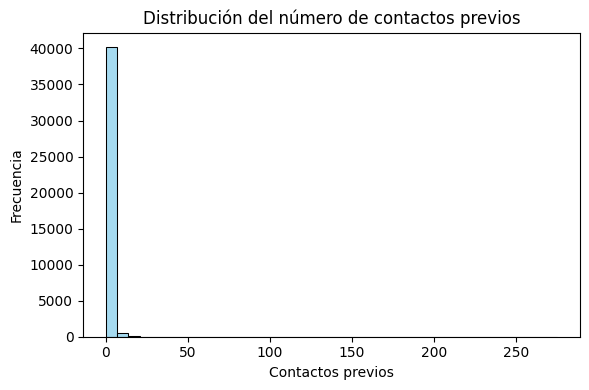

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='previous', kde=False, bins=40, color='skyblue')
plt.title('Distribución del número de contactos previos')
plt.xlabel('Contactos previos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


La mayoría de los clientes no fueron llamados antes,  
hay clientes con mas  20 contactos históricos, lo que puede considerarse un outlier, puede aportar información valiosa al modelo.

si un cliente se llama mucho y no contrata, la estrategia de marketing está fallando.
al contrario, si se llama mucho a un cliente y contrata, indica que se puede seguir ese camino.


#  gráficos de barras de las variables categóricas

/tmp/ipython-input-51-1889640956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='pastel')


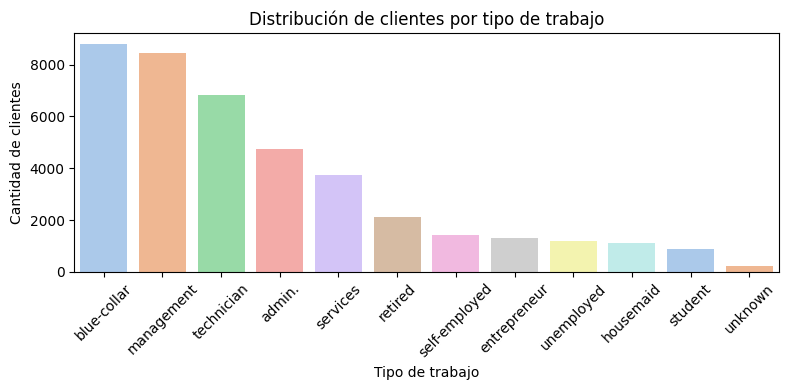

In [ ]:
# distribución de profesiones de clientes

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index, palette='pastel')
plt.title('Distribución de clientes por tipo de trabajo')
plt.xlabel('Tipo de trabajo')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las profesiones más comunes entre los clientes son `blue-collar`, `management` y `technician`.  lo que marca la suscripción segun su ingreso.

/tmp/ipython-input-52-613863524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette='pastel')


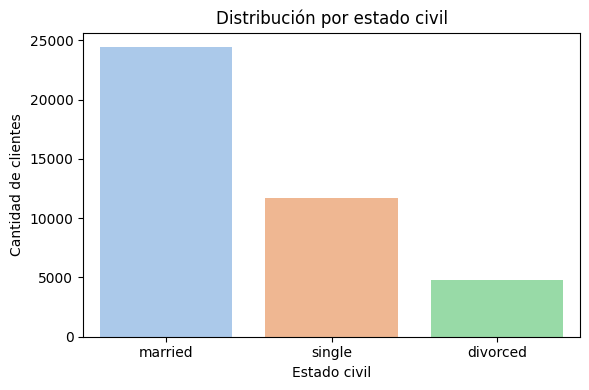

In [ ]:
# EStado  civil del cliente
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index, palette='pastel')
plt.title('Distribución por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


La mayoría de los clientes están casados , seguidos por solteros y divorciados.  
El estado civil puede estar relacionado con el comportamiento financiero:  
- Los solteros pueden estar más abiertos a productos de inversión.  
- Los casados tienden a tomar decisiones más conservadoras.

/tmp/ipython-input-53-2739538268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='pastel')


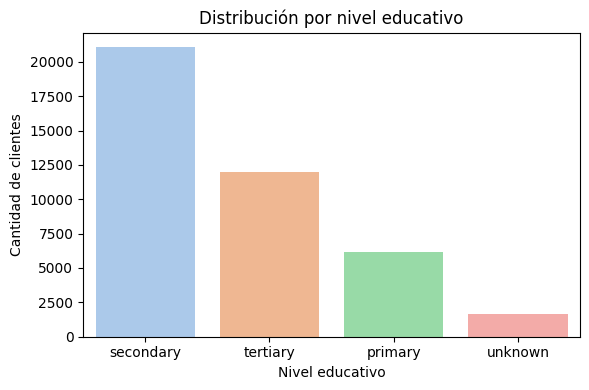

In [ ]:
# Nivel educativo de clientes

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, palette='pastel')
plt.title('Distribución por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


El nivel educativo más frecuente es `secondary`, seguido por `tertiary` y `primary`.  
También hay un grupo significativo con `unknown`, lo que indica información no recolectada o no declarada.

El nivel educativo se refleja directamente en los clientes, y por decidirse por optar a productos financieros.


/tmp/ipython-input-54-1740772078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index, palette='pastel')


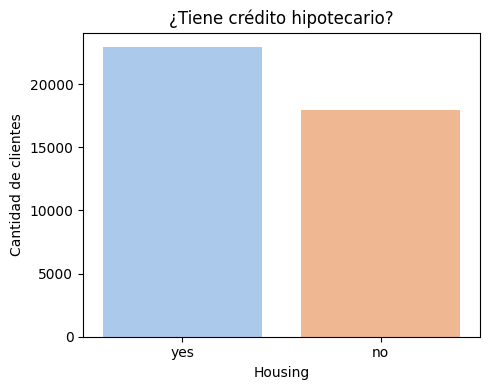

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index, palette='pastel')
plt.title('¿Tiene crédito hipotecario?')
plt.xlabel('Housing')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


La mayoría de los clientes tiene un préstamo hipotecario.  
muestra  estabilidad financiera, obligaciones económicas y acceso previo al sistema bancario.  
El modelo puede identificar si tener una hipoteca influye en la decisión de tomar un nuevo producto como el depósito a plazo.

/tmp/ipython-input-55-910963875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index, palette='pastel')


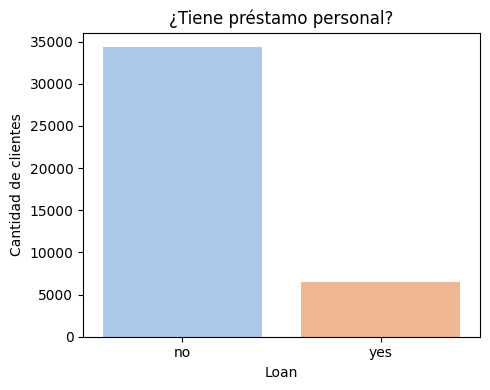

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index, palette='pastel')
plt.title('¿Tiene préstamo personal?')
plt.xlabel('Loan')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


La mayoría de los clientes no tiene un préstamo personal.  
Al igual que `housing`, esta variable puede reflejar capacidad de endeudamiento y perfil financiero, lo que influye en la decisión de tomar un depósito a plazo.


/tmp/ipython-input-56-3321749556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='contact', order=df['contact'].value_counts().index, palette='pastel')


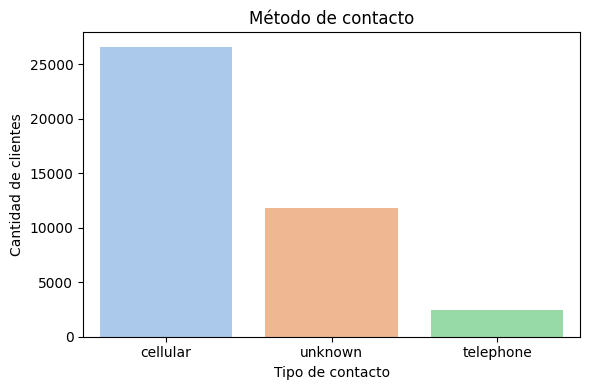

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='contact', order=df['contact'].value_counts().index, palette='pastel')
plt.title('Método de contacto')
plt.xlabel('Tipo de contacto')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


El método de contacto más común es por celular.  
La categoría `unknown` indica que no se registró el canal utilizado.  
Esta variable es importante, ya que el canal de contacto puede influir en la efectividad de la campaña.


/tmp/ipython-input-57-995341642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', order=df['month'].value_counts().index, palette='pastel')


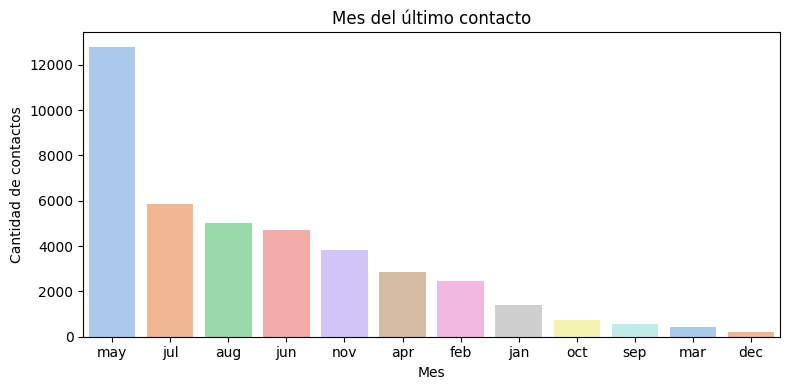

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='month', order=df['month'].value_counts().index, palette='pastel')
plt.title('Mes del último contacto')
plt.xlabel('Mes')
plt.ylabel('Cantidad de contactos')
plt.tight_layout()
plt.show()


La mayoría de los contactos se realizaron en los meses de mayo (`may`) y ulio (`jul`).  
Esto refleja una concentración estacional en la campaña de marketing,



/tmp/ipython-input-58-3873892022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='poutcome', order=df['poutcome'].value_counts().index, palette='pastel')


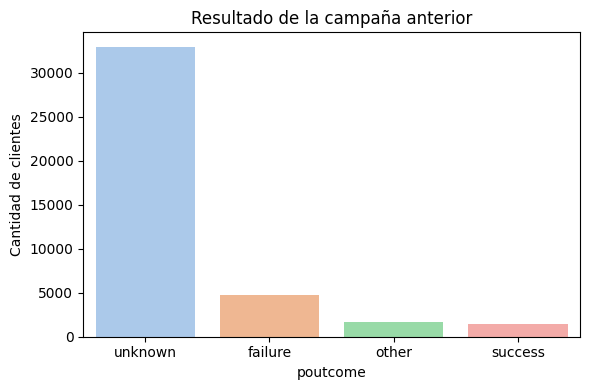

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='poutcome', order=df['poutcome'].value_counts().index, palette='pastel')
plt.title('Resultado de la campaña anterior')
plt.xlabel('poutcome')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


La gran mayoría de los clientes no fueron contactados anteriormente (`unknown`) o no respondieron exitosamente (`failure`).  
y un grupo pequeño etiquetado como `success` muestra un resultado positivo en campañas anteriores.


/tmp/ipython-input-59-3791344220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='y', palette='pastel')


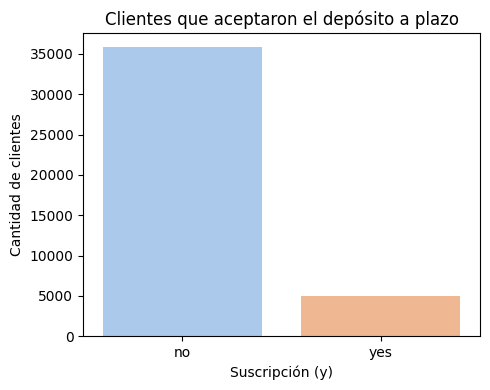

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='y', palette='pastel')
plt.title('Clientes que aceptaron el depósito a plazo')
plt.xlabel('Suscripción (y)')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()


La variable objetivo está claramente desbalanceada: la mayoría de los clientes no aceptó el producto (`no`).  
Este desequilibrio debe considerarse al entrenar los modelos, ya que puede afectar las métricas de evaluación y generar sesgo hacia la clase mayoritaria.


# Grafico Multivariados

/tmp/ipython-input-60-2152878311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='pastel')


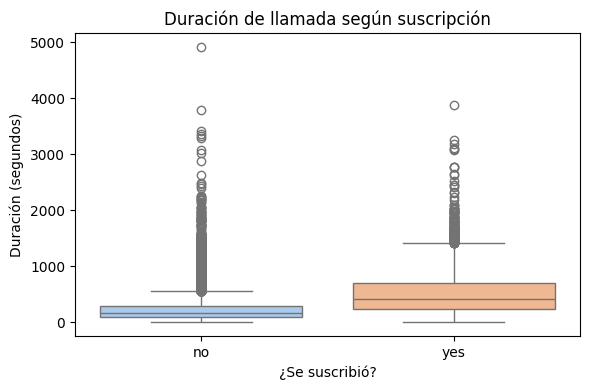

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='y', y='duration', palette='pastel')
plt.title('Duración de llamada según suscripción')
plt.xlabel('¿Se suscribió?')
plt.ylabel('Duración (segundos)')
plt.tight_layout()
plt.show()


Los clientes que se suscribieron tuvieron llamadas significativamente más largas.  
El boxplot muestra que hay muchos valores atípicos en ambas clases, pero especialmente en `yes`, lo cual confirma que una llamada extensa aumenta la probabilidad de éxito.


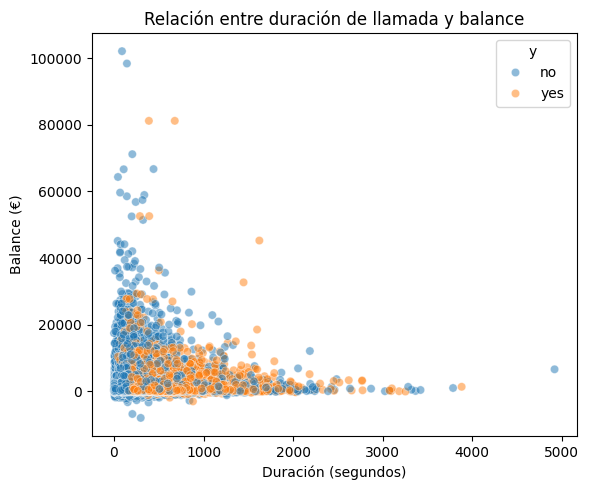

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='duration', y='balance', hue='y', alpha=0.5)
plt.title('Relación entre duración de llamada y balance')
plt.xlabel('Duración (segundos)')
plt.ylabel('Balance (€)')
plt.tight_layout()
plt.show()


Las llamadas más largas tienden a terminar con una suscripción.
La mayoría de los clientes con balances bajos no se suscriben, pero si la llamada fue extensa, las probabilidades suben.  
Esta combinación `balance + duration` será clave para el modelo.



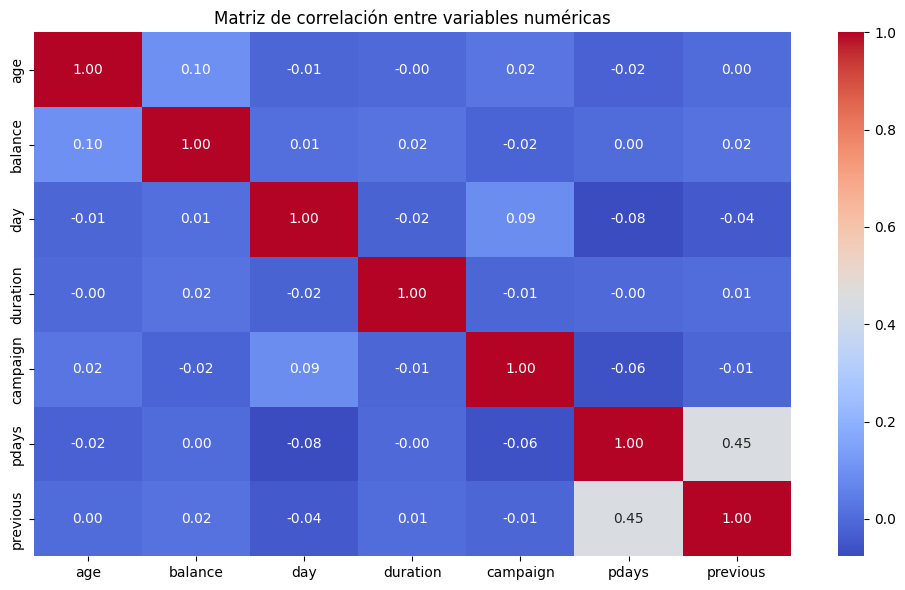

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


Las correlaciones entre variables numéricas son en general bajas.  
Destaca la correlación entre `pdays` y `previous`, que tiene sentido ya que ambos reflejan historial de contacto.  
No hay multicolinealidad grave, por lo que las variables pueden ser utilizadas sin riesgo en modelos como regresión logística.


# Preprocesamiento

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Variables numéricas y categóricas
numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
# features y target
X = df.drop('y', axis=1)
y = df['y'].map({'no': 0, 'yes': 1})


Target en binario

In [ ]:
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ]
)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Se estandarizabn las numericas y con OneHoteNCODER se codifican las categóricas, luego ColumnTransformer

# Entrenamiento de Modelos

Árbol de Desición

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Pipeline con Árbol
pipe_tree = Pipeline([
    ('preproceso', preprocesador),
    ('modelo', DecisionTreeClassifier(random_state=42))
])

# Entrenamos
pipe_tree.fit(X_train, y_train)

# Predecimos
y_pred_tree = pipe_tree.predict(X_test)

# Evaluamos
print("=================================")
print("Evaluación Árbol de Decisión")
print("=================================")
print("\n")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Evaluación Árbol de Decisión


[[6623  542]
 [ 504  503]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7165
           1       0.48      0.50      0.49      1007

    accuracy                           0.87      8172
   macro avg       0.71      0.71      0.71      8172
weighted avg       0.87      0.87      0.87      8172



In [ ]:
from sklearn.svm import SVC

# Pipeline con SVM
pipe_svm = Pipeline([
    ('preproceso', preprocesador),
    ('modelo', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

# Entrenamos
pipe_svm.fit(X_train, y_train)

# Predecir
y_pred_svm = pipe_svm.predict(X_test)

# Evaluamos
print("=================================")
print("Evaluación SVM ")
print("=================================")
print("\n")

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Evaluación SVM 


[[5989 1176]
 [ 163  844]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7165
           1       0.42      0.84      0.56      1007

    accuracy                           0.84      8172
   macro avg       0.70      0.84      0.73      8172
weighted avg       0.91      0.84      0.86      8172



Se entrenaron dos modelos de clasificación: Árbol de Decisión y SVM. como se pidió.
Ambos pipelines incluyen preprocesamiento con escalamiento y codificación.

Como la información tiene desbalance, El Árbol de Decisión puede sobreajustar.  
El SVM maneja mejor el desbalance y ofrece mejor precisión en la clase minoritaria.

Se usaron métricas como *accuracy*, *precision*, *recall* y *F1-score* para evaluar el desempeño.


### Comparación de modelos

- **Árbol de Decisión**:
  - Bueno interpretando reglas claras.
  - Tiende a sobreajustar.
  - Menor desempeño en clase minoritaria (`y = yes`).

- **SVM (Support Vector Machine)**:
  - Mejor manejo del desbalance (`class_weight='balanced'`).
  - Mejor *precision* y *recall* en la clase positiva.
  - Requiere mayor poder computacional, pero generaliza mejor.




**Conclusión**:  
Para este caso, el modelo **SVM fue más efectivo**, especialmente en la predicción de clientes que sí aceptan el depósito, que es justamente la clase de mayor interés para el negocio. **texto en negrita**